In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func,distinct

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine,reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table   # Reflect Database into ORM class
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
pd.DataFrame(columns)


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,date,TEXT,True,None,auto,0
3,prcp,FLOAT,True,None,auto,0
4,tobs,FLOAT,True,None,auto,0


In [11]:
# Use `engine.execute` to select and display the first 10 rows from the measurement table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
# Query measurement and station and save the query into results_m
results_m = session.query(Measurement.id, Measurement.station, Measurement.date,Measurement.prcp,Measurement.tobs).all()

In [14]:
# Load the results into a pandas dataframe. 
measurement_df = pd.DataFrame(results_m, columns=['id', 'station', 'date','prcp','tobs'])
measurement_df.set_index('id', inplace=True, )
measurement_df.head(10)

,station,date,prcp,tobs
id,,,,
1,USC00519397,2010-01-01,0.08,65.0
2,USC00519397,2010-01-02,0.00,63.0
3,USC00519397,2010-01-03,0.00,74.0
4,USC00519397,2010-01-04,0.00,76.0
5,USC00519397,2010-01-06,NaN,73.0
6,USC00519397,2010-01-07,0.06,70.0
7,USC00519397,2010-01-08,0.00,64.0
8,USC00519397,2010-01-09,0.00,68.0
9,USC00519397,2010-01-10,0.00,73.0


# Exploratory Climate Analysis

In [89]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data



# Total dates
session.query(func.count(Measurement.date)).all()
# Earliest and Latest Date
earliest_date=session.query(Measurement.date).order_by(Measurement.date).first()
latest_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Earliest date of the database {earliest_date}")
print(f"Latest date of the database {latest_date}")
#print(type(earliest_date))
from datetime import date
from dateutil.relativedelta import relativedelta
twelve_months = str(dt.date(2017, 8, 23) - relativedelta(months=+12))
#print(type(twelve_months))
print(f"The last 12 months to plot the data will query until this date {twelve_months}")

#SELECT COUNT (*) FROM Measurement WHERE date >= query date AND date < = latest_date

twelve_months_query =session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= twelve_months).\
                                            order_by(Measurement.date.asc()).all()


# Load the results into a pandas dataframe. Set the index to the `id`
df = pd.DataFrame(twelve_months_query, columns=['date','prcp'])
df.set_index('date', inplace=True, )
df = df[['prcp']]
df = df.sort_index()

Earliest date of the database ('2010-01-01',)
Latest date of the database ('2017-08-23',)
The last 12 months to plot the data will query until this date 2016-08-23


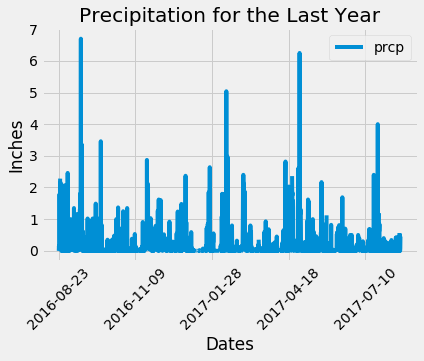

In [94]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=45)
plt.xlabel('Dates')
plt.ylabel('Inches')
plt.title('Precipitation for the Last Year')
plt.savefig("Precipitation_last_year.png")
plt.show()



In [91]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

results_s = session.query(Station.id, Station.station, Station.name,Station.latitude,Station.longitude,Station.elevation).all()

# Load the results into a pandas dataframe. 
station_df = pd.DataFrame(results_s, columns=['id','station', 'name','latitude','longitude','elevation'])
station_df.set_index('id', inplace=True, )
station_df.head(10)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
pd.DataFrame(columns)

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,name,TEXT,True,None,auto,0
3,latitude,FLOAT,True,None,auto,0
4,longitude,FLOAT,True,None,auto,0
5,elevation,FLOAT,True,None,auto,0


In [95]:
# Design a query to show how many stations are available in this dataset?
available_stations = session.query(func.count(Station.id)).all()
print(f'There are {available_stations[0][0]} stations available')
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
r1=session.query(Measurement.station,func.count(Measurement.tobs)).\
group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
r1

There are 9 stations available


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [100]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active=r1[0][0]

min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station==most_active).all()
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station==most_active).all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station==most_active).all()

print(f'The lowest temperature recorded is: {min_temp[0][0]}°F')
print(f'The highest temperature recorded is: {max_temp[0][0]}°F')
print(f'The average temperature is: {round(avg_temp[0][0],2)}°F')

The lowest temperature recorded is: 54.0°F
The highest temperature recorded is: 85.0°F
The average temperature is: 71.66°F


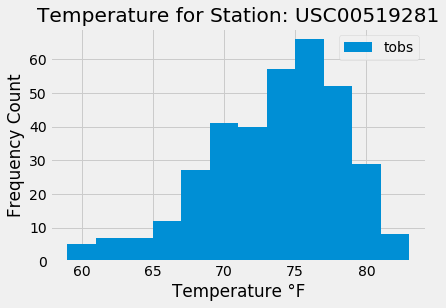

In [108]:
# Choose the station with the highest number of temperature observations.

r50=session.query(Measurement.tobs).filter(Measurement.station ==most_active).filter(Measurement.date > twelve_months).\
                      order_by(Measurement.date.asc()).all()

# Load the results into a pandas dataframe. Set the index to the `id`
df = pd.DataFrame(r50, columns=['tobs'])


# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df.plot.hist(bins=12)
plt.xlabel('Temperature °F')
plt.ylabel('Frequency Count')
plt.title(f'Temperature for Station: {most_active}')
plt.savefig("Temp_Most_active_Station.png")
plt.show()



## Bonus Challenge Assignment

In [112]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [119]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


print(f"Select a initial and final date between {earliest_date} and {latest_date} for your trip")
agno_inicial = input("Year of initial date in format YYYY:    ")
mes_inicial =input("Month of initial date in format number 1 to 12:    ")
dia_inicial = input("Day of initial date (1-31):    ")
agno_final = input("Year of final date in format YYYY:    ")
mes_final =input("Month of final date in format number 1 to 12:    ")
dia_final = input("Day of final date (1-31):    ")

initial_date=str(agno_inicial)+"-"+str(mes_inicial)+"-"+str(dia_inicial)
final_date=str(agno_final)+"-"+str(mes_final)+"-"+str(dia_final)

#date_time_obj = dt.strptime(initial_date, '%Y-%m-%d')
Max_vac = dt.datetime(int(agno_inicial),int(mes_inicial),int(dia_inicial)) + dt.timedelta(days=15)
Min_vac = dt.datetime(int(agno_inicial),int(mes_inicial),int(dia_inicial)) + dt.timedelta(days=3)

if Max_vac <  dt.datetime(int(agno_final),int(mes_final),int(dia_final))\
   or Min_vac >  dt.datetime(int(agno_final),int(mes_final),int(dia_final)) :
    print(f"Vacations days allowed is between 3-15 days, please select another final vacation date")
    agno_final = input("Year of final date in format YYYY:    ")
    mes_final =input("Month of final date in format number 1 to 12:    ")
    dia_final = input("Day of final date (1-31):    ")
    final_date=str(agno_final)+"-"+str(mes_final)+"-"+str(dia_final)
    


one_yr_ago_init=str(dt.date(int(agno_inicial),int(mes_inicial),int(dia_inicial)) - relativedelta(months=+12))
one_yr_ago_final=str(dt.date(int(agno_final),int(mes_final),int(dia_final)) - relativedelta(months=+12))

print(f"_________________________________________________________________________________________________________")
print(f"The minimum, average, and maximum temperatures for your trip using the previous year's data for those same dates {one_yr_ago_init} and {one_yr_ago_final} are:    ")
#print(calc_temps(one_yr_ago_init,one_yr_ago_final))
temp_info=calc_temps(one_yr_ago_init,one_yr_ago_final)
print(f"The temperatures info for this range of dates {initial_date} and {final_date} are:    ")
print(f'The lowest temperature recorded is: {temp_info[0][0]}°F')
print(f'The highest temperature recorded is: {temp_info[0][1]}°F')
print(f'The average temperature is: {round(temp_info[0][2],2)}°F')



Select a initial and final date between ('2010-01-01',) and ('2017-08-23',) for your trip
Year of initial date in format YYYY:    2016
Month of initial date in format number 1 to 12:    11
Day of initial date (1-31):    1
Year of final date in format YYYY:    2016
Month of final date in format number 1 to 12:    11
Day of final date (1-31):    16
_________________________________________________________________________________________________________
The minimum, average, and maximum temperatures for your trip using the previous year's data for those same dates 2015-11-01 and 2015-11-16 are:    
The temperatures info for this range of dates 2016-11-1 and 2016-11-16 are:    
The lowest temperature recorded is: 70.0°F
The highest temperature recorded is: 76.64423076923077°F
The average temperature is: 83.0°F


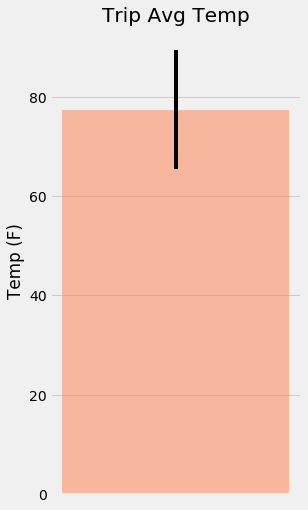

In [117]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
error = temp_info[0][2] - temp_info[0][0]
plt.bar(0, temp_info[0][1], yerr=error, alpha=0.5, color='coral', align="center")
plt.ylabel('Temp (F)')
plt.title('Trip Avg Temp')
plt.xticks([])
plt.savefig("Trip_Avg_Temp.png")
plt.show()



In [122]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

results = session.query(Station.station,
                  func.sum(Measurement.prcp),
                  Station.name,
                  Station.latitude,
                  Station.longitude,
                  Station.elevation)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date >= initial_date)\
.filter(Measurement.date <= final_date)\
.group_by(Station.station)\
.order_by(func.sum(Measurement.prcp).desc())

print(f"Vacation Dates: {initial_date} - {final_date}")
print(f"One year ago Data Used: {one_yr_ago_init} - {one_yr_ago_final}")
print()
for row in results:
    rainfall = "{0:.2f}".format(row[1])
    print (f"Station:  {row[0]}\n    Rainfall:  {rainfall}  \n    Location:  {row[2]}\n    Latitude:  {row[3]}  \
    Longitude:  {row[4]}  Elevation:  {row[5]}")
    print()


Vacation Dates: 2016-11-1 - 2016-11-16
One year ago Data Used: 2015-11-01 - 2015-11-16

Station:  USC00516128
    Rainfall:  0.99  
    Location:  MANOA LYON ARBO 785.2, HI US
    Latitude:  21.3331      Longitude:  -157.8025  Elevation:  152.4

Station:  USC00519281
    Rainfall:  0.24  
    Location:  WAIHEE 837.5, HI US
    Latitude:  21.45167      Longitude:  -157.84888999999998  Elevation:  32.9

Station:  USC00514830
    Rainfall:  0.23  
    Location:  KUALOA RANCH HEADQUARTERS 886.9, HI US
    Latitude:  21.5213      Longitude:  -157.8374  Elevation:  7.0

Station:  USC00513117
    Rainfall:  0.20  
    Location:  KANEOHE 838.1, HI US
    Latitude:  21.4234      Longitude:  -157.8015  Elevation:  14.6

Station:  USC00519523
    Rainfall:  0.07  
    Location:  WAIMANALO EXPERIMENTAL FARM, HI US
    Latitude:  21.33556      Longitude:  -157.71139  Elevation:  19.5

Station:  USC00517948
    Rainfall:  0.02  
    Location:  PEARL CITY, HI US
    Latitude:  21.3934      Longitude:

In [123]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

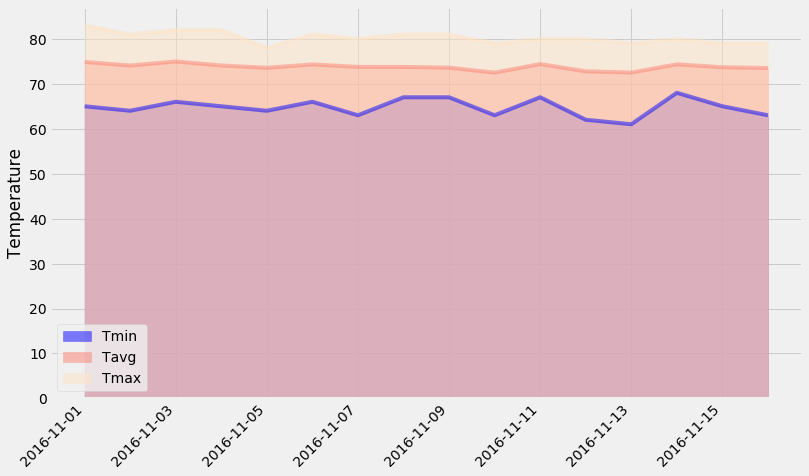

In [126]:
# calculate the daily normals for your trip
# Set the start and end date of the trip
# Use the start and end date to create a range of dates

trip_dates = pd.date_range(initial_date, final_date)
trip_md = trip_dates.strftime('%m-%d')

# push each tuple of calculations into a list called `normals`
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date

normals = []
for trip_date in trip_md:
    normals.append(*daily_normals(trip_date))

    
   # Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns = ['Tmin', 'Tavg', 'Tmax'])
normals_df['Date'] = trip_dates
normals_df = normals_df.set_index('Date')

# Plot the daily normals as an area plot with `stacked=False`
colors = ['blue', 'salmon', 'bisque']
normals_df.plot(kind='area', figsize=(12, 8), stacked=False, x_compat=True, color=colors, alpha=.5, rot=45)
plt.xlabel('')
plt.ylabel('Temperature')
plt.savefig("Daily_Normals_temperatures.png")
plt.show()